In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
raw1=pd.read_csv("서울경마_더미4.csv",engine = 'python')
raw2=pd.read_csv("서울경마_더미4.csv",engine = 'python')
raw3=pd.read_csv("서울경마_더미4.csv",engine = 'python')

In [3]:
raw1=raw1.dropna()
raw1=raw1.reset_index(drop=True)
raw2=raw2.dropna()
raw2=raw2.reset_index(drop=True)
raw3=raw3.dropna()
raw3=raw3.reset_index(drop=True)



In [4]:
# 1마리만 1등
for i in range(len(raw1)):
    if raw1.iloc[i,0] < 2:
        raw1.iloc[i,0]=1
    else:
        raw1.iloc[i,0]=0
# 2마리가 1등 2등
for i in range(len(raw2)):
    if raw2.iloc[i,0] < 3:
        raw2.iloc[i,0]=1
    else:
        raw2.iloc[i,0]=0
# 3마리가 1등 2등 3등
for i in range(len(raw3)):
    if raw3.iloc[i,0] < 4:
        raw3.iloc[i,0]=1
    else:
        raw3.iloc[i,0]=0

In [5]:
tr_data1, te_data1 = train_test_split(raw1, test_size=0.2)

tr_X1 = tr_data1.iloc[:,1:]
tr_Y1 = tr_data1.iloc[:,0]
te_X1 = te_data1.iloc[:,1:]
te_Y1 = te_data1.iloc[:,0]

lr1 = LogisticRegression(C=1e5,solver='lbfgs',multi_class='ovr',class_weight='balanced')
cl1 = lr1.fit(tr_X1.values,tr_Y1.values)

fpr1, tpr1, _ = roc_curve(te_Y1, cl1.decision_function(te_X1),pos_label=1)

tr_data2, te_data2 = train_test_split(raw2, test_size=0.2)

tr_X2 = tr_data2.iloc[:,1:]
tr_Y2 = tr_data2.iloc[:,0]
te_X2 = te_data2.iloc[:,1:]
te_Y2 = te_data2.iloc[:,0]

lr2=LogisticRegression(C=1e5,solver='lbfgs',multi_class='ovr',class_weight='balanced')
cl2=lr2.fit(tr_X2.values,tr_Y2.values)
yscore2=cl2.decision_function(te_X2)
fpr2, tpr2, _ = roc_curve(te_Y2, yscore2,pos_label=1)

tr_data3, te_data3 = train_test_split(raw3, test_size=0.2)

tr_X3 = tr_data3.iloc[:,1:]
tr_Y3 = tr_data3.iloc[:,0]
te_X3 = te_data3.iloc[:,1:]
te_Y3 = te_data3.iloc[:,0]

lr3=LogisticRegression(C=1e5,solver='lbfgs',multi_class='ovr',class_weight='balanced')
cl3=lr3.fit(tr_X3.values,tr_Y3.values)
yscore3=cl3.decision_function(te_X3)
fpr3, tpr3, _ = roc_curve(te_Y3, yscore3,pos_label=1)

tr_data4, te_data4 = train_test_split(raw1, test_size=0.2)

tr_X4 = tr_data4.iloc[:,1:]
tr_Y4 = tr_data4.iloc[:,0]
te_X4 = te_data4.iloc[:,1:]
te_Y4 = te_data4.iloc[:,0]

rf4=RandomForestClassifier(n_estimators=500, max_depth=25, max_features='auto', bootstrap=False,class_weight='balanced_subsample')
cl4=rf4.fit(tr_X4.values,tr_Y4.values)

yscore4=cl4.predict_proba(te_X4)
fpr4, tpr4, _ = roc_curve(te_Y4, yscore4[:, 1],pos_label=1)

tr_data5, te_data5 = train_test_split(raw2, test_size=0.2)

tr_X5 = tr_data5.iloc[:,1:]
tr_Y5 = tr_data5.iloc[:,0]
te_X5 = te_data5.iloc[:,1:]
te_Y5 = te_data5.iloc[:,0]

rf5=RandomForestClassifier(n_estimators=500, max_depth=25, max_features='auto', bootstrap=False,class_weight='balanced_subsample')
cl5=rf5.fit(tr_X5.values,tr_Y5.values)

yscore5=cl5.predict_proba(te_X5)
fpr5, tpr5, _ = roc_curve(te_Y5, yscore5[:, 1],pos_label=1)

tr_data6, te_data6 = train_test_split(raw3, test_size=0.2)

tr_X6 = tr_data6.iloc[:,1:]
tr_Y6 = tr_data6.iloc[:,0]
te_X6 = te_data6.iloc[:,1:]
te_Y6 = te_data6.iloc[:,0]

rf6=RandomForestClassifier(n_estimators=500, max_depth=25, max_features='auto', bootstrap=False,class_weight='balanced_subsample')
cl6=rf6.fit(tr_X6.values,tr_Y6.values)

yscore6=cl6.predict_proba(te_X6)
fpr6, tpr6, _ = roc_curve(te_Y6, yscore6[:, 1],pos_label=1)


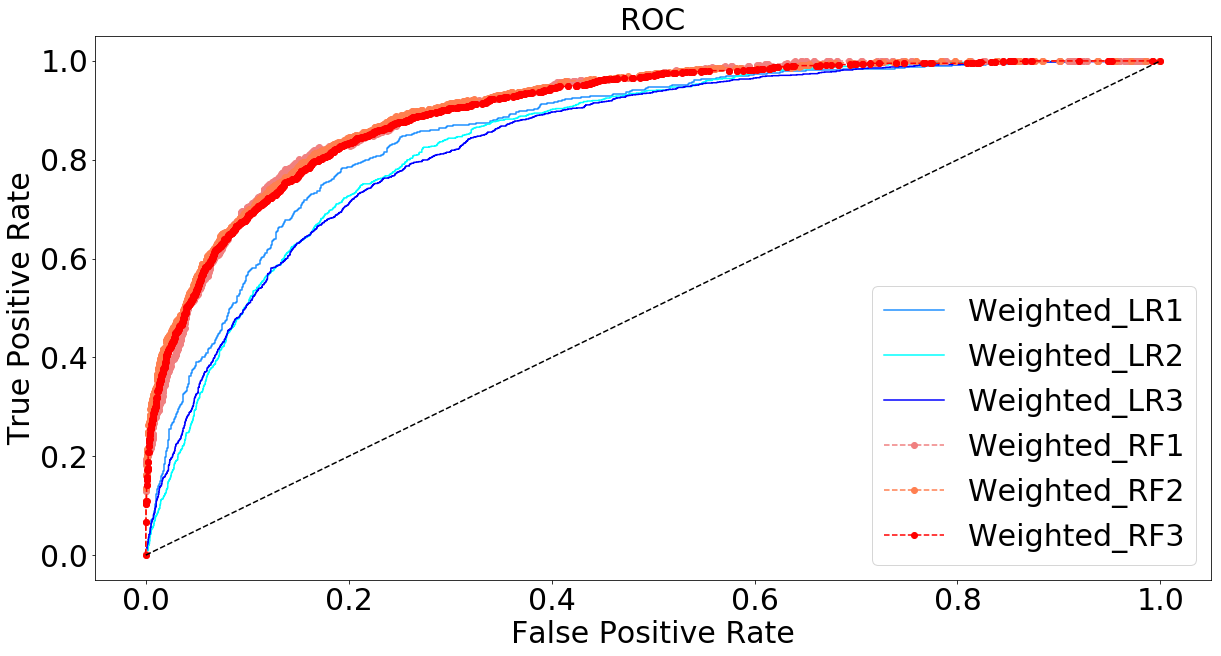

In [6]:
plt.figure(figsize=(20,10))
plt.tick_params(axis='x', labelsize=30) 
plt.tick_params(axis='y', labelsize=30) 

plt.plot(fpr1, tpr1,label="Weighted_LR1",color='dodgerblue')
plt.plot(fpr2, tpr2,label="Weighted_LR2",color='aqua')
plt.plot(fpr3, tpr3,label="Weighted_LR3",color='blue')
plt.plot(fpr4, tpr4,'o--',label="Weighted_RF1",color='lightcoral')
plt.plot(fpr5, tpr5,'o--',label="Weighted_RF2",color='coral')
plt.plot(fpr6, tpr6 ,'o--',label="Weighted_RF3",color='red')
plt.plot([0, 1], [0, 1], 'k--')


plt.xlabel('False Positive Rate',size=30)
plt.ylabel('True Positive Rate',size=30)
plt.title('ROC',size=30)
plt.legend(loc="lower right",prop={'size':30})
plt.show()